In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [29]:
print([x_train.shape, y_train.shape], [x_test.shape, y_test.shape])

[(50000, 32, 32, 3), (50000, 1)] [(10000, 32, 32, 3), (10000, 1)]


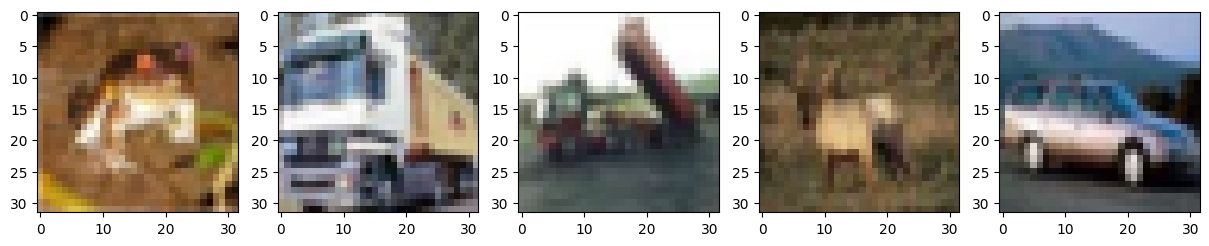

In [30]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 5, 1)
plt.imshow(x_train[0])
plt.subplot(1, 5, 2)
plt.imshow(x_train[1])
plt.subplot(1, 5, 3)
plt.imshow(x_train[2])
plt.subplot(1, 5, 4)
plt.imshow(x_train[3])
plt.subplot(1, 5, 5)
plt.imshow(x_train[4])

In [31]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [32]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print("X_train shape:", x_train.shape)  # (N, H, W, C)
print("y_train shape:", y_train.shape)  # (N, Category_number)
print("X_validation shape:", x_val.shape) # (N, H, W, C)
print("y_validation shape:", y_val.shape) # (N, Category_number)

X_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 10)
X_validation shape: (5000, 32, 32, 3)
y_validation shape: (5000, 10)


In [37]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.2444 - loss: 1.9853 - val_accuracy: 0.5038 - val_loss: 1.3459
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.4836 - loss: 1.4294 - val_accuracy: 0.5556 - val_loss: 1.1973
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.5588 - loss: 1.2519 - val_accuracy: 0.6072 - val_loss: 1.0961
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6039 - loss: 1.1399 - val_accuracy: 0.6474 - val_loss: 1.0041
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.6315 - loss: 1.0527 - val_accuracy: 0.6628 - val_loss: 0.9583
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6666 - loss: 0.9724 - val_accuracy: 0.6714 - val_loss: 0.9443
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.6827 - loss: 0.9236 - val_accuracy: 0.6856 - val_loss: 0.9063
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7063 -

In [41]:
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_val, y_val), initial_epoch=10)

In [43]:
model.save('cifar10CNN.h5')

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6911 - loss: 0.8862
Test Accuracy: 0.6912


In [52]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), initial_epoch=10)

Epoch 11/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7414 - loss: 0.7602 - val_accuracy: 0.6824 - val_loss: 0.9112
Epoch 12/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7538 - loss: 0.7325 - val_accuracy: 0.7032 - val_loss: 0.8851
Epoch 13/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7632 - loss: 0.6913 - val_accuracy: 0.6960 - val_loss: 0.9141
Epoch 14/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7689 - loss: 0.6754 - val_accuracy: 0.7124 - val_loss: 0.8553
Epoch 15/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7759 - loss: 0.6519 - val_accuracy: 0.7098 - val_loss: 0.8633
Epoch 16/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7836 - loss: 0.6287 - val_accuracy: 0.7086 - val_loss: 0.8813
Epoch 17/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7872 - loss: 0.6187 - val_accuracy: 0.7000 - val_loss: 0.9189
Epoch 18/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 

In [55]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7081 - loss: 1.0884
Test Accuracy: 0.7031000256538391
Test Loss: 1.0866073369979858


In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model,
          to_file='model1.png',
          show_shapes=True,
          show_dtype=True,
          show_layer_names=True,
          rankdir="TB",
          show_layer_activations=True,
          show_trainable=True)

In [58]:
model.save('cifar10CNN_30epochs.h5')

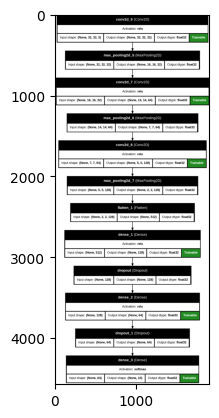

In [65]:
import cv2
img = cv2.imread('/kaggle/working/model1.png')

plt.imshow(img)